In [31]:
import numpy as np
from numpy import heaviside as th
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm
import pickle

# Normalised Function

Simulation of 100.0s.


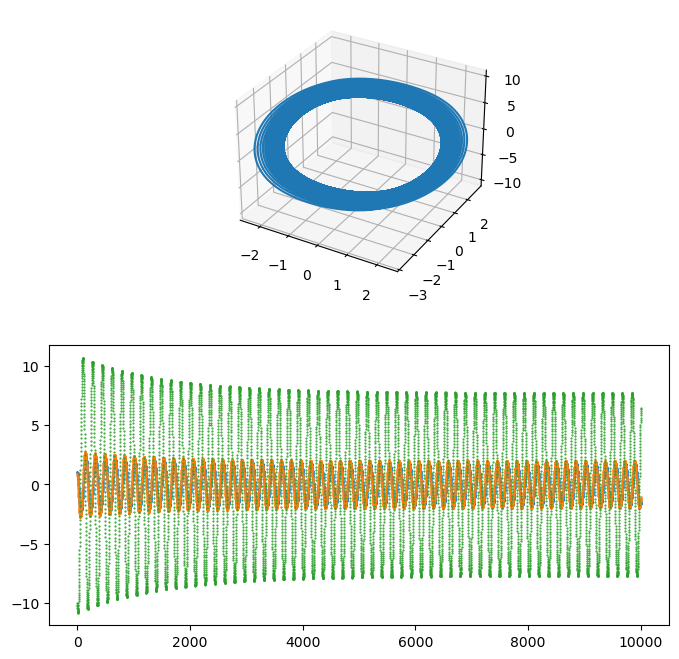

In [116]:
alpha,beta = 9,14.2886

def NIC(x):
    a,b = -1/7,2/7
    if x <= -1:
        f = b*x+b-a
    elif abs(x) < 1:
        f = a*x
    else:
        f = b*x-b+a
    return f

F,freq = 1,20

dt = 1e-2; duration = 1e4
print(f"Simulation of {dt*duration}s.")

X,Y,Z = [1],[1],[-10]
for i in range(int(duration)):
    t = i*dt

    xi,yi,zi = X[-1],Y[-1],Z[-1]

    dx = alpha*(yi-xi-NIC(xi))
    dy = xi-yi+zi
    # dz = -beta*(yi+F*np.sin(2*np.pi*freq*t))
    dz = -beta*yi
    
    X.append(xi+dx*dt);Y.append(yi+dy*dt);Z.append(zi+dz*dt)

duration = int(duration+1)
t = range(duration)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

time_s = plt.subplot(grid[1])
time_s.scatter(t,X,s=0.3); time_s.scatter(t,Y,s=0.3); time_s.scatter(t,Z,s=0.3)

plot3D = fig.add_subplot(grid[0],projection='3d')
plot3D.plot(X,Y,Z
            #    ,s=0.03
               )

plt.show()

# Actual Values

[0.0004581324179765894, 0.004545454545454545, 8.190818181818182] 
 [0.00030046913060475746, 4.545454545454545e-05, 1.1829130434782609]
Simulation of 0.5s.


Draw plots: 100%|██████████| 3/3 [01:52<00:00, 37.64s/it]


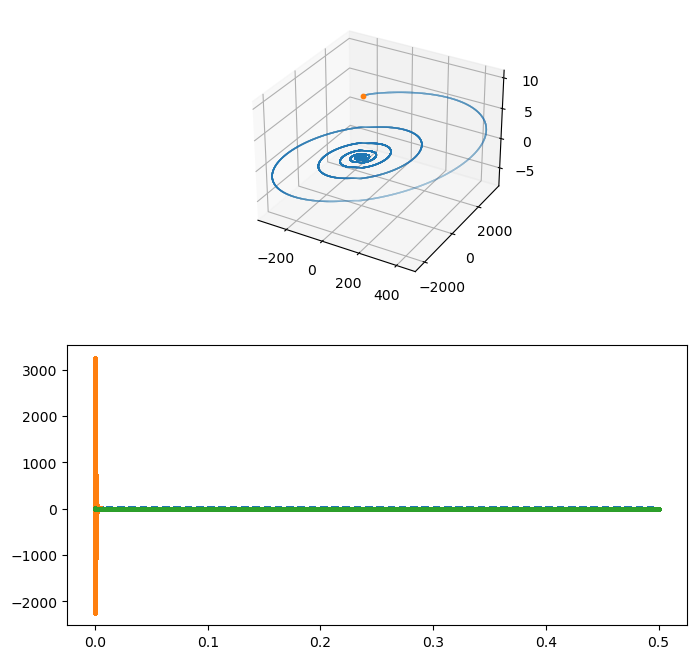

In [51]:
# Parameters 

R = 1410
C1 = 10e-9
C2 = 100e-9
L = 15e-3

R2,R3 = 220,2200
R4,R6 = 22000,3300
A = 1000; E = 9

F,freq = 5,100

interior = [((A-1)*R2+R3)/(R2*(R2+(1+A)*R3))
            ,1/R2,
            (R2+(1+A)*R3)/(A*(R2+R3))*E]
exterior = [((A-1)*R4+R6)/(R4*(R4+(1+A)*R6))
            ,1/R4
            ,(R4+(1+A)*R6)/(A*(R4+R6))*E]

print(interior,"\n",exterior)

def NIC(x,a,b,B):
    g = -a*x*(th(x+B,1)-th(x-B,1)) # Centre
    g += (b*x+(a+b)*B)*th(-x-B,1) # Lefterior
    g += (b*x-(a+b)*B)*th(x-B,1) # Righterior
    return g

def Chua(x,a1,b1,B1,a2,b2,B2):
    return NIC(x,a1,b1,B1)+NIC(x,a2,b2,B2)

In [ ]:
# Numerical interation method 1

dt = 5e-8; duration = 1e7
print(f"Simulation of {dt*duration}s.")

X,Y,Z = [10],[10],[10]
for i in tqdm(range(int(duration))):
    t = i*dt

    xi,yi,zi = X[-1],Y[-1],Z[-1]

    dx = (yi-xi)/R-Chua(xi,*interior,*exterior)
    dy = (xi-yi)/R+zi
    dz = -yi+F*np.sin(2*np.pi*freq*t)
    # dz = -yi
    X.append(xi+dx/C1*dt);Y.append(yi+dy/C2*dt);Z.append(zi+dz/L*dt)

t = [t*dt for t in range(int(duration+1))]

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

time_s = plt.subplot(grid[1])

# idx = 800
# fdx = 4000

idx = 0
fdx = int(duration)

X,Y,Z,t = X[idx:fdx],Y[idx:fdx],Z[idx:fdx],t[idx:fdx]

for data in tqdm([X,Y,Z],desc="Draw plots"):
    time_s.scatter(t,data,s=3)

plot3D = fig.add_subplot(grid[0],projection='3d')
plot3D.scatter(X[::10000],Y[::10000],Z[::10000]
               ,s=0.003
               )
plot3D.scatter(X[0],Y[0],Z[0]
               ,s=10
               )

plt.savefig(f"../figures/Simulation_R{R}.png")

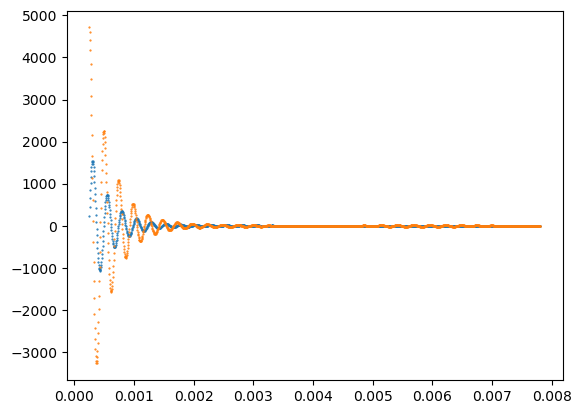

In [67]:
# data = {"param": 
#         {"R":R,"C1":C1,"C2":C2,"L":L
#          ,"R2":R2,"R3":R3,"R4":R4,"R6":R6,"E":E
#          ,"F":F,"f":freq},
#          "simul": {"dt":dt,"dur":duration}
#          ,"X":X,"Y":Y,"Z":Z,"t":t}

# handle = open(f"sim_R{R}.pkl", 'wb')
# pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
# handle.close()

scaled = [z*1000 for z in Z]
ini = 5000
end = int(len(Y)/2**6)
spac = 100
# plt.plot(X[::500],scaled[::500])
plt.scatter(t[ini:end:spac],Y[ini:end:spac],s=0.3)
plt.scatter(t[ini:end:spac],scaled[ini:end:spac],s=0.3)

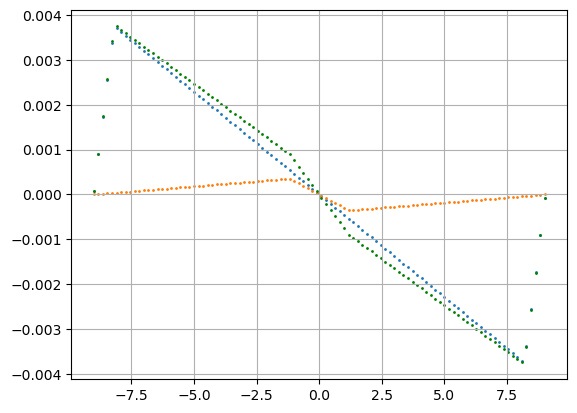

In [73]:
# Check Diode function

Vin = np.linspace(-9,9,100)
Y1 = [NIC(x,*interior) for x in Vin]
Y2 = [NIC(x,*exterior) for x in Vin]
Y0 = [Chua(x,*interior,*exterior) for x in Vin]

for Vout in [Y1,Y2]:
    plt.scatter(Vin,Vout
             ,s=1
             )

plt.scatter(Vin,Y0
            ,s=1
            ,color="green")
plt.grid()